# 공공데이터 활용

- https://www.data.go.kr/

- 사용할 패키지 호출

- API이용시 필요한 정보 입력

In [7]:
LAWD_CD = "11110"
DEAL_YMD = "201512"
serviceKey  = "MMc9HcZzSMSfwjnS1gBUFHq2Fb6sPHLarVx%2Boi9seEd3qUGzYUR4PhshZS9Sd06k0DNjdHwRdSW1qOLY5psDDw%3D%3D"
url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD={}&DEAL_YMD={}&serviceKey={}".format(LAWD_CD,DEAL_YMD,serviceKey)

- 패키지내 함수를 이용해 API 호출


In [8]:
import urllib
from bs4 import BeautifulSoup
import requests

In [9]:
import pandas as pd
import numpy as np

## 목표 설정

In [10]:
res = urllib.request.urlopen(url)

In [11]:
result = res.read()

In [12]:
soup = BeautifulSoup(result,"xml")

In [17]:
items = soup.findAll("item")

In [19]:
keylist = ["거래금액","건축년도","년","법정동","아파트","월","일","전용면적","지번","지역코드","층"]

In [29]:
len(keylist)

11

In [23]:
itemlist = []

In [24]:
for v in items:
    item = {}
    
    for key in keylist:
        try:
            item[key] = v.find(key).text
        except :
            item[key] = np.nan
    itemlist.append(item)


In [27]:
df = pd.DataFrame(itemlist)

In [28]:
df

,거래금액,건축년도,년,법정동,아파트,월,일,전용면적,지번,지역코드,층
0,"82,500",2008,2015,사직동,광화문풍림스페이스본(101동~105동),12,10,94.51,9,11110,11
1,"60,000",1981,2015,당주동,롯데미도파광화문빌딩,12,22,149.95,145,11110,8
2,"130,000",2004,2015,내수동,킹스매너,12,8,194.43,110-15,11110,6
3,"105,000",2004,2015,내수동,경희궁의아침2단지,12,14,124.17,71,11110,8
4,"120,000",2003,2015,내수동,경희궁 파크팰리스,12,24,146.33,95,11110,4
5,"17,000",2014,2015,연건동,이화에수풀,12,17,16.98,195-10,11110,8
6,"17,000",2014,2015,연건동,이화에수풀,12,18,16.98,195-10,11110,4
7,"57,000",2006,2015,명륜1가,렉스빌,12,29,106.98,19,11110,3
8,"44,000",1995,2015,명륜2가,아남1,12,1,84.8,4,11110,18
9,"52,000",1995,2015,명륜2가,아남1,12,10,84.9,4,11110,12


## 데이터 탐색

- 각 컬럼의 데이터 타입을 확인

In [33]:
df  = pd.read_csv("./data/openup_apt_seoul_df.xls",nrows=10000)

- 각 컬럼별 결측치를 확인

In [34]:
df.isnull().sum()

Unnamed: 0        0
LAWD_CD           0
DEAL_YM           0
거래금액              0
건축년도              0
년                 0
월                 0
일                 0
법정동               0
아파트               0
전용면적              0
지번              216
지역코드              0
층                 0
단지총세대수            0
총동수               0
총주차대수         51403
용적율           11840
건폐율           15621
local1            0
local2            0
local3            0
dtype: int64

- 동일한 정보를 보유하고 있는 컬럼이 있는지 확인

In [39]:
df.head(1)

,LAWD_CD,DEAL_YM,거래금액,건축년도,년,월,일,법정동,아파트,전용면적,...,지역코드,층,단지총세대수,총동수,총주차대수,용적율,건폐율,local1,local2,local3
0,11110,200601,29500,1983.0,2006,1,17,당주동,세종,93.4,...,11110,6,72.0,1.0,121.0,0.0,0.0,서울특별시,종로구,당주동


In [36]:
del df["Unnamed: 0"]

In [40]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [41]:
df.head(1)

,LAWD_CD,DEAL_YM,거래금액,건축년도,년,월,일,법정동,아파트,전용면적,지번,지역코드,층,단지총세대수,총동수,총주차대수,용적율,건폐율,local1,local2,local3
0,11110,200601,29500,1983.0,2006,1,17,당주동,세종,93.4,100,11110,6,72.0,1.0,121.0,0.0,0.0,서울특별시,종로구,당주동


In [45]:
df = df[df["local2"].isin(["노원구","관악구","동작구","용산구"])]

In [46]:
df["거래일"] = pd.to_datetime(df[["년","월","일"]].apply(lambda x : "{}-{}-{}".format(x[0],x[1],x[2]),axis=1))

In [48]:
df.drop(columns=["년","월","일"],inplace=True)

- 동일한 정보를 보유하고 있는 컬럼 제거

In [49]:
df.dtypes

LAWD_CD             int64
DEAL_YM             int64
거래금액                int64
건축년도              float64
법정동                object
아파트                object
전용면적              float64
지번                 object
지역코드                int64
층                   int64
단지총세대수            float64
총동수               float64
총주차대수             float64
용적율               float64
건폐율               float64
local1             object
local2             object
local3             object
거래일        datetime64[ns]
dtype: object

## 결측치 처리 방법

- 해당 컬럼의 중앙값 또는 평균값으로 처리

In [50]:
import matplotlib.pyplot as plt

In [51]:
import missingno as msno

/home/beomseok/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
%matplotlib inline

In [54]:
msno.matrix(df)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt: 

In [ ]:
msno.heatmap(df)

In [ ]:
msno.bar(df)

- 다른 컬럼의 값이 결측치가 작은경우 해당값을 이용해 결측치를 추정

In [57]:
df.drop_duplicates(subset=["LAWD_CD","local2"]).groupby(["LAWD_CD"])["local2"].agg(["count"])

,count
LAWD_CD,
11170,1
11350,1
11590,1
11620,2


In [58]:
df[df["LAWD_CD"]==11620]["local2"].value_counts()

관악구    34414
동작구       24
Name: local2, dtype: int64

In [59]:
df[(df["LAWD_CD"]==11620)&(df["local2"]=="동작구")]

,LAWD_CD,DEAL_YM,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,단지총세대수,총동수,총주차대수,용적율,건폐율,local1,local2,local3,거래일
23404,11620,200603,51000,2000.0,봉천동,캐릭터그린빌,142.47,729-24,11620,25,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2006-03-13
23688,11620,200602,49000,2000.0,봉천동,캐릭터그린빌,142.47,729-24,11620,24,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2006-02-08
117620,11620,200703,54500,2000.0,봉천동,캐릭터그린빌,120.54,729-24,11620,15,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2007-03-13
170863,11620,200804,65000,2000.0,봉천동,캐릭터그린빌,120.54,729-24,11620,22,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2008-04-07
232548,11620,200909,63000,2000.0,봉천동,캐릭터그린빌,120.54,729-24,11620,23,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2009-09-07
331630,11620,201108,74000,2000.0,봉천동,캐릭터그린빌,183.40,729-24,11620,25,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2011-08-23
378523,11620,201212,60000,2000.0,봉천동,캐릭터그린빌,142.47,729-24,11620,17,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2012-12-03
379294,11620,201205,65000,2000.0,봉천동,캐릭터그린빌,142.47,729-24,11620,17,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2012-05-30
488762,11620,201409,57700,2000.0,봉천동,캐릭터그린빌,142.47,729-24,11620,26,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2014-09-01
489437,11620,201406,55000,2000.0,봉천동,캐릭터그린빌,120.54,729-24,11620,15,482.0,1.0,167.0,1001.0,47.0,서울특별시,동작구,신대방동,2014-06-10


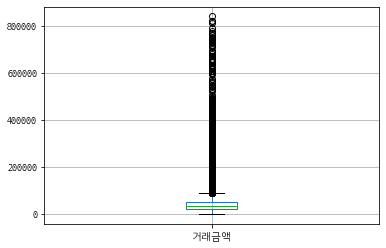

In [61]:
df.boxplot(column="거래금액")

In [62]:
df["거래금액"].describe()

count    215746.000000
mean      41726.163197
std       34309.078783
min        1031.000000
25%       23000.000000
50%       34500.000000
75%       50500.000000
max      840000.000000
Name: 거래금액, dtype: float64

In [63]:
df["거래금액"].idxmax()

956122

In [64]:
df.loc[956122]

LAWD_CD                  11170
DEAL_YM                 201901
거래금액                    840000
건축년도                      2011
법정동                        한남동
아파트                       한남더힐
전용면적                   244.749
지번                         810
지역코드                     11170
층                            3
단지총세대수                     600
총동수                         32
총주차대수                     1732
용적율                        120
건폐율                         29
local1                   서울특별시
local2                     용산구
local3                     한남동
거래일        2019-01-10 00:00:00
Name: 956122, dtype: object

In [66]:
import warnings
warnings.filterwarnings("ignore")

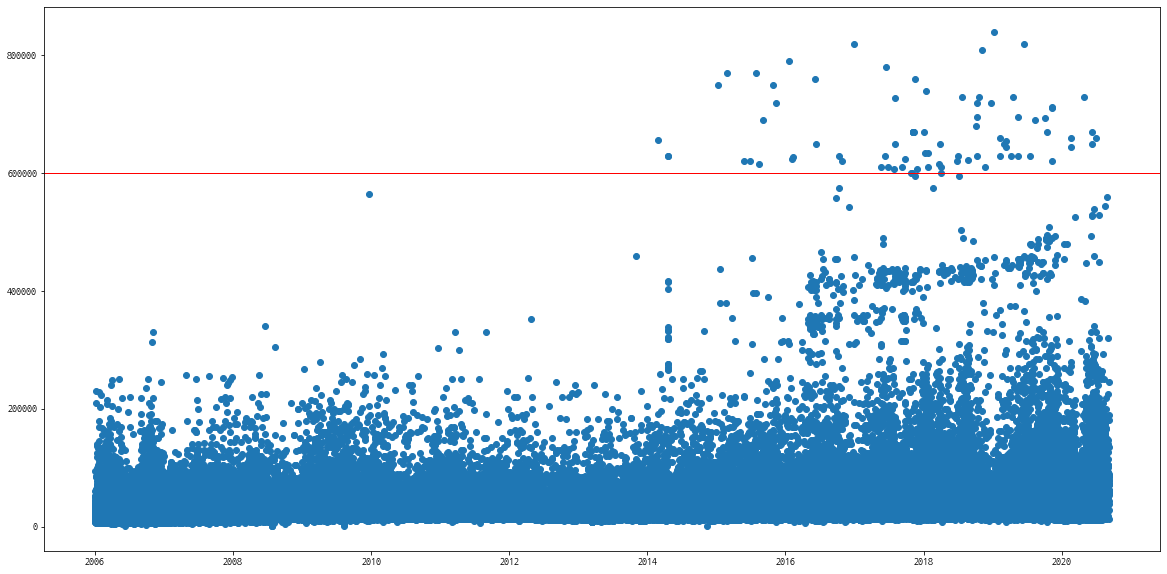

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df["거래일"] , df["거래금액"],"o")
plt.axhline(y=600000,  color="r",linewidth=1)
plt.show()

## 범주형 데이터 다루기

In [70]:
df = df[["거래금액","거래일","건축년도","아파트","전용면적","층","단지총세대수","총동수","총주차대수","용적율","건폐율","local1","local2","local3","지번"]]

In [71]:
df.isnull().sum()

거래금액          0
거래일           0
건축년도          0
아파트           0
전용면적          0
층             0
단지총세대수        0
총동수           0
총주차대수     11615
용적율        1131
건폐율        3163
local1        0
local2        0
local3        0
지번            0
dtype: int64

In [74]:
df.loc[df["총주차대수"].isnull() , "총주차대수"] = df[df["총주차대수"].notnull()]["총주차대수"].mean()

In [75]:
df.loc[df["용적율"].isnull() , "용적율"] = df[df["용적율"].notnull()]["용적율"].mean()

In [76]:
df.loc[df["건폐율"].isnull() , "건폐율"] = df[df["건폐율"].notnull()]["건폐율"].mean()

- LabelEncoder을 이용한 변수변환

In [77]:
from sklearn.preprocessing import LabelEncoder

In [80]:
df["local2"] = df["local1"] + "-"+ df["local2"]

In [81]:
df["local3"] = df["local2"] + "-"+df["local3"]

In [82]:
df["지번"] = df["local3"] + "-" + df["지번"]

In [83]:
local3_encoder = LabelEncoder()

In [85]:
df["local3_encoded"] = local3_encoder.fit_transform(df["local3"].values.reshape(-1,1))

In [86]:
df[["local3","local3_encoded"]].head(5)

,local3,local3_encoded
20361,서울특별시-관악구-봉천동,1
20362,서울특별시-관악구-봉천동,1
20363,서울특별시-관악구-봉천동,1
20364,서울특별시-관악구-봉천동,1
20365,서울특별시-관악구-봉천동,1


In [87]:
df["local3_decoded"] = local3_encoder.inverse_transform(df["local3_encoded"])

In [88]:
df[["local3","local3_encoded","local3_decoded"]].head(5)

,local3,local3_encoded,local3_decoded
20361,서울특별시-관악구-봉천동,1,서울특별시-관악구-봉천동
20362,서울특별시-관악구-봉천동,1,서울특별시-관악구-봉천동
20363,서울특별시-관악구-봉천동,1,서울특별시-관악구-봉천동
20364,서울특별시-관악구-봉천동,1,서울특별시-관악구-봉천동
20365,서울특별시-관악구-봉천동,1,서울특별시-관악구-봉천동


In [89]:
del df["local3_decoded"]

In [90]:
local1_encoder = LabelEncoder()
df["local1_encoded"] = local1_encoder.fit_transform(df["local1"])

local2_encoder = LabelEncoder()
df["local2_encoded"] = local2_encoder.fit_transform(df["local2"])

jibun_encoder = LabelEncoder()
df["jibun_encoded"] = jibun_encoder.fit_transform(df["지번"])

apt_encoder = LabelEncoder()
df["apt_encoded"] = apt_encoder.fit_transform(df["아파트"])

In [91]:
df.drop(columns=["local1","local2","local3","지번","아파트"],inplace=True)

- OneHotEncoder을 이용한 변수변환

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(df["local2_encoded"].values.reshape(-1,1))

OneHotEncoder()

In [102]:
df["local2_encoded"].shape

(215746,)

In [101]:
df["local2_encoded"].values.reshape(-1,1).shape

(215746, 1)

In [103]:
df.head(1)

,거래금액,거래일,건축년도,전용면적,층,단지총세대수,총동수,총주차대수,용적율,건폐율,local3_encoded,local1_encoded,local2_encoded,jibun_encoded,apt_encoded
20361,28200,2006-12-01,2003.0,60.0,14,3544.0,44.0,5402.0,267.0,16.0,1,0,0,40,39


In [98]:
ont_hot_label = one_hot_encoder.transform(df["local2_encoded"].values.reshape(-1,1))

In [100]:
print(ont_hot_label.toarray())

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


- Pandas 기본 메서드를 이용한 변수변환

In [104]:
pd.get_dummiesmies(df["local2_encoded"])

,0,1,2,3
20361,1,0,0,0
20362,1,0,0,0
20363,1,0,0,0
20364,1,0,0,0
20365,1,0,0,0
...,...,...,...,...
1070498,0,0,0,1
1070499,0,0,0,1
1070500,0,0,0,1
1070501,0,0,0,1


## 변수생성

In [108]:
df["세대당주차대수"] = df["총주차대수"] / df["단지총세대수"]

In [109]:
df["거래일_year"] = df["거래일"].dt.year


In [110]:
df["아파트_경과년수"] = df["거래일_year"] - df["건축년도"]

In [ ]:
# 노원구 월계동 동신아파트  전용면적 71.83  , 2020-09-07

In [112]:
train_df = df[df["거래일"]<"2020-09-07"]

In [114]:
test_df = df[df["거래일"]>="2020-09-07"]

In [115]:
train_df.dtypes

거래금액                       int64
거래일               datetime64[ns]
건축년도                     float64
전용면적                     float64
층                          int64
단지총세대수                   float64
총동수                      float64
총주차대수                    float64
용적율                      float64
건폐율                      float64
local3_encoded             int64
local1_encoded             int64
local2_encoded             int64
jibun_encoded              int64
apt_encoded                int64
세대당주차대수                  float64
거래일_year                   int64
아파트_경과년수                 float64
dtype: object

In [116]:
object_col_index = [10,11,12,13,14]

In [117]:
train_x = train_df.drop(columns=["거래일","거래금액"])
train_y = train_df["거래금액"]
 
test_x = test_df.drop(columns=["거래일","거래금액"])
test_y = test_df["거래금액"]

## 모델생성

In [118]:
from catboost import CatBoostRegressorgressor

In [121]:
model = CatBoostRegressor(iterations=1000 , learning_rate=0.003, loss_function="RMSE")

In [123]:
train_x.shape

(215735, 16)

In [126]:
train_x.dtypes

건축년도              float64
전용면적              float64
층                   int64
단지총세대수            float64
총동수               float64
총주차대수             float64
용적율               float64
건폐율               float64
local3_encoded      int64
local1_encoded      int64
local2_encoded      int64
jibun_encoded       int64
apt_encoded         int64
세대당주차대수           float64
거래일_year            int64
아파트_경과년수          float64
dtype: object

In [127]:
object_col_index=[8,9,10,11,12]

In [128]:
model.fit(train_x , train_y , cat_features=object_col_index)

0:	learn: 34229.5879182	total: 401ms	remaining: 6m 40s
1:	learn: 34148.7048637	total: 858ms	remaining: 7m 8s
2:	learn: 34068.0926980	total: 2.21s	remaining: 12m 15s
3:	learn: 33988.8829563	total: 2.49s	remaining: 10m 20s
4:	learn: 33909.1818744	total: 2.76s	remaining: 9m 10s
5:	learn: 33829.3158732	total: 3.04s	remaining: 8m 24s
6:	learn: 33751.2769936	total: 3.38s	remaining: 7m 59s
7:	learn: 33672.3715361	total: 3.66s	remaining: 7m 33s
8:	learn: 33592.8120890	total: 3.94s	remaining: 7m 14s
9:	learn: 33515.9172192	total: 4.33s	remaining: 7m 9s
10:	learn: 33437.8504836	total: 4.64s	remaining: 6m 57s
11:	learn: 33361.5137447	total: 4.85s	remaining: 6m 39s
12:	learn: 33284.0087693	total: 5.1s	remaining: 6m 27s
13:	learn: 33205.9306218	total: 5.39s	remaining: 6m 19s
14:	learn: 33129.0508935	total: 5.67s	remaining: 6m 12s
15:	learn: 33052.5826643	total: 5.95s	remaining: 6m 5s
16:	learn: 32976.4787724	total: 6.26s	remaining: 6m 1s
17:	learn: 32900.1367041	total: 6.54s	remaining: 5m 56s
18:	l

KeyboardInterrupt: 

In [ ]:
model.pred(test_x)

In [ ]:
test_y

## 단일 시계열 추정

In [ ]:
# 노원구 월계동 동신아파트  전용면적 71.83  , 2020-09-07

In [130]:
df["local1"] = local1_encoder.inverse_transform(df["local1_encoded"])

In [131]:
df["local2"] = local2_encoder.inverse_transform(df["local2_encoded"])
df["local3"] = local3_encoder.inverse_transform(df["local3_encoded"])
df["아파트"] = apt_encoder.inverse_transform(df["apt_encoded"])
df["지번"] = jibun_encoder.inverse_transform(df["jibun_encoded"])

In [134]:
series_1 = df[(df["local3"]=="서울특별시-노원구-월계동")&(df["아파트"]=="동신")]

In [136]:
series_1 = series_1[series_1["전용면적"]==71.83]

In [138]:
series_1 = series_1[["거래일","거래금액"]]

In [140]:
series_1.set_index(keys=["거래일"],inplace=True)

In [143]:
prophet_input_df = series_1.resample("W-MON").median()

In [145]:
prophet_input_df.reset_index(drop=False,inplace=True)

In [147]:
prophet_input_df.columns =["ds","y"]

In [150]:
save_df = prophet_input_df.copy()

In [151]:
prophet_input_df = prophet_input_df[prophet_input_df["ds"]<"2020-09-07"]

In [152]:
prophet_input_df

,ds,y
0,2006-01-23,14100.0
1,2006-01-30,NaN
2,2006-02-06,NaN
3,2006-02-13,NaN
4,2006-02-20,NaN
...,...,...
758,2020-08-03,NaN
759,2020-08-10,NaN
760,2020-08-17,58000.0
761,2020-08-24,NaN


In [148]:
from fbprophet import Prophet

In [149]:
m = Prophet()

In [153]:
m.fit(prophet_input_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [154]:
future = m.make_future_dataframe(periods=1 , freq="W-MON")

In [155]:
forecast = m.predict(future)

In [156]:
forecast.tail(1)[["ds","yhat"]]

,ds,yhat
763,2020-09-07,50868.218884


In [157]:
save_df.tail(1)

,ds,y
763,2020-09-07,59400.0


- 유사한 시계열